In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


What is Categorical data?

* Categorical data represents information that can be sorted into distinct groups or categories, rather than measured numerically
* It is Qualitative


### Encoding Techniques


1.   Label Encoder
2.   OHE
3.   Ordinal
4.   Freq



#### Label Encoding

In [207]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [208]:
color=['Red','Green','Blue','Red','Yellow']
le=LabelEncoder()
encoded_data=le.fit_transform(color)
print(encoded_data)

[2 1 0 2 3]


### OHE
we can do two ways
1. pandas  :- pd.get_dummies
2. using sklearn -> OHE

#### Using Pandas


In [209]:
df=pd.DataFrame({"Animals":['cat','dog','fox']})
print(df)
encoded_df=pd.get_dummies(df['Animals'])
print(encoded_df)

  Animals
0     cat
1     dog
2     fox
     cat    dog    fox
0   True  False  False
1  False   True  False
2  False  False   True


In [210]:
df= pd.DataFrame({'Colors':['Red','Green','Blue','Red','Yellow']})
print(df)
encoded_color=pd.get_dummies(df,columns=['Colors'])
print(encoded_color)

   Colors
0     Red
1   Green
2    Blue
3     Red
4  Yellow
   Colors_Blue  Colors_Green  Colors_Red  Colors_Yellow
0        False         False        True          False
1        False          True       False          False
2         True         False       False          False
3        False         False        True          False
4        False         False       False           True


In [211]:
from sklearn.preprocessing import OneHotEncoder

animals = [['cat', 'dog', 'fox', 'dog', 'fox', 'cat']]

ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(animals)

print(encoded_data)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (1, 6)>
  Coords	Values
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0


In [212]:
from sklearn.preprocessing import OneHotEncoder

animals = [['cat'], ['dog'], ['fox'], ['dog'], ['fox'], ['cat']]

ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(animals) # sparse will give where the coodiates where we havethe 1.0 the coordiates with values

print(encoded_data)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (6, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 0)	1.0


In [213]:
from sklearn.preprocessing import OneHotEncoder

animals = [['cat'], ['dog'], ['fox'], ['dog'], ['fox'], ['cat']]

ohe = OneHotEncoder(sparse_output=False) #  # sparse=False to get array output
encoded_data = ohe.fit_transform(animals)

print(encoded_data)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Ordinal Encoing

In [214]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

education = ['ssc', 'inter', 'UG', 'PG']
education = np.array(education)

ord_enc = OrdinalEncoder(
    categories=[['PG', 'UG', 'inter', 'ssc']]
)

encoded_ord = ord_enc.fit_transform(education.reshape(-1, 1))
print(encoded_ord)


[[3.]
 [2.]
 [1.]
 [0.]]


In [215]:
from sklearn.preprocessing import OrdinalEncoder
education=[['ssc'],['inter'],['UG'],['PG']]
encoder=OrdinalEncoder(categories=[['ssc','inter','UG','PG']])
encoded_data=encoder.fit_transform(education)
print(encoded_data)

[[0.]
 [1.]
 [2.]
 [3.]]


#### Freq/Count Encoding

In [216]:
df= pd.DataFrame({'Colors':['Red','Green','Blue','Red','Yellow','Red','Yellow','Blue','Red']})


print(df)

   Colors
0     Red
1   Green
2    Blue
3     Red
4  Yellow
5     Red
6  Yellow
7    Blue
8     Red


In [217]:
df.Colors.value_counts()


,count
Colors,
Red,4
Blue,2
Yellow,2
Green,1


In [218]:
freq={'Red':3,'Green':1,'Blue':2,'Yellow':0} ## here we give the manual data bcz the2 is for both Ble and Yellow when we don't give the manual the machine cann't defined
df['freq']=df['Colors'].map(freq)
print(df)

   Colors  freq
0     Red     3
1   Green     1
2    Blue     2
3     Red     3
4  Yellow     0
5     Red     3
6  Yellow     0
7    Blue     2
8     Red     3


### Data Preprocessing on Categorical columns Day2 with the dataset

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
data= pd.read_csv('/content/drive/MyDrive/Datasets/loan_approved.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [295]:
data.shape

(614, 13)

In [296]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [297]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [298]:
## precentage of the null values
data.isnull().sum()/len(data)*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [299]:
data = data.drop('Loan_ID', axis=1)
data= data.drop('Dependents',axis=1)

In [300]:
num_cols=data.select_dtypes(include=['float64','int64']).columns
cat_cols=data.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')


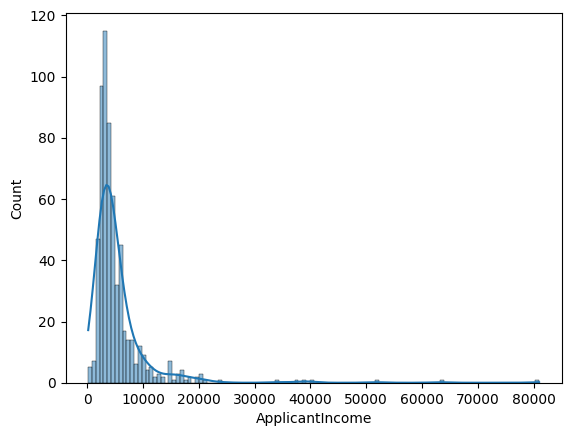

/tmp/ipython-input-188000150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[num].fillna(data[num].median(),inplace=True)


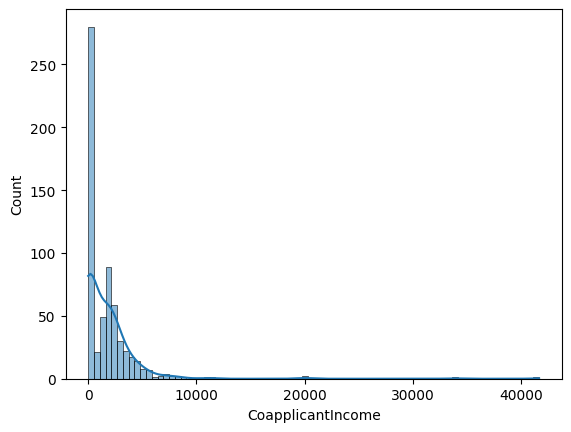

/tmp/ipython-input-188000150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[num].fillna(data[num].median(),inplace=True)


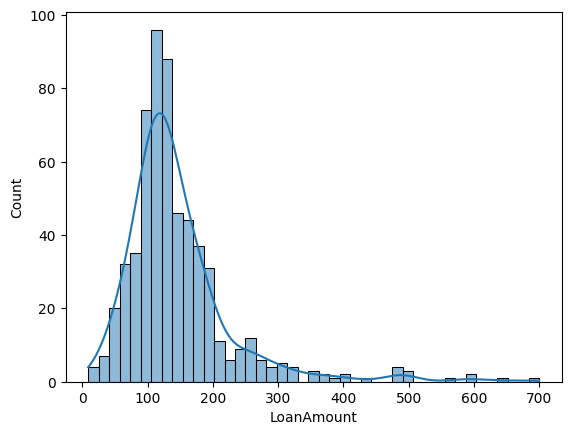

/tmp/ipython-input-188000150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[num].fillna(data[num].median(),inplace=True)


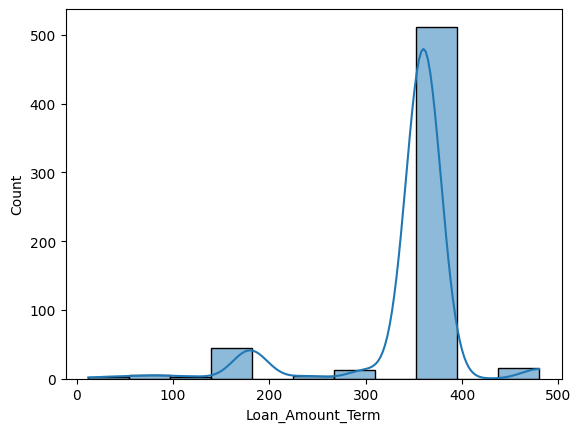

/tmp/ipython-input-188000150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[num].fillna(data[num].median(),inplace=True)


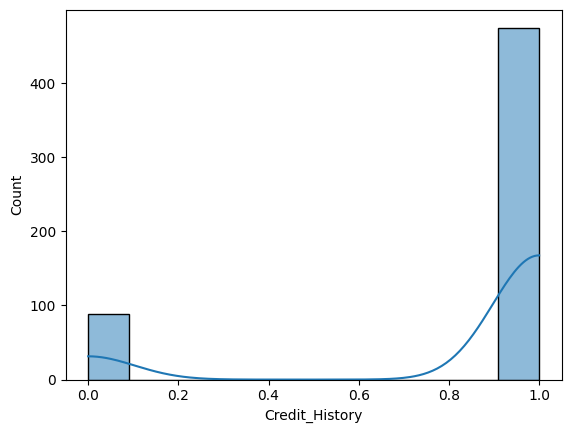

/tmp/ipython-input-188000150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[num].fillna(data[num].median(),inplace=True)


In [301]:
for num in num_cols:
  sns.histplot(data[num],kde=True)
  plt.show()
  data[num].fillna(data[num].median(),inplace=True)

In [302]:
data.isnull().sum()

,0
Gender,13
Married,3
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


In [303]:


for cat in cat_cols:
  data[cat].fillna(data[cat].mode()[0],inplace=True)

/tmp/ipython-input-829923363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[cat].fillna(data[cat].mode()[0],inplace=True)


In [304]:
data.isnull().sum()

,0
Gender,0
Married,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


In [305]:
data.isnull().sum()

,0
Gender,0
Married,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    object 
 2   Education               614 non-null    object 
 3   Self_Employed           614 non-null    object 
 4   ApplicantIncome         614 non-null    int64  
 5   CoapplicantIncome       614 non-null    float64
 6   LoanAmount              614 non-null    float64
 7   Loan_Amount_Term        614 non-null    float64
 8   Credit_History          614 non-null    float64
 9   Property_Area           614 non-null    object 
 10  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [307]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [308]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [309]:
data['Gender']

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [310]:
data.tail(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
604,0,Yes,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,1,Yes,Not Graduate,No,2400,3800.0,128.0,180.0,1.0,Urban,N
606,1,Yes,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,1,Yes,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,1,Yes,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,0,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,0,No,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [311]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [312]:
from sklearn.preprocessing import LabelEncoder
le_married=LabelEncoder()
data['Married']=le_married.fit_transform(data['Married'])

In [313]:
data['Married'].unique()

array([0, 1])

In [314]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [242]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
data['Education']=le_education.fit_transform(data['Education'])

In [243]:
data['Education'].unique()

array([0, 1])

In [244]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [245]:
from sklearn.preprocessing import LabelEncoder
le_self_employed=LabelEncoder()
data['Self_Employed']=le_self_employed.fit_transform(data['Self_Employed'])

In [246]:
data['Self_Employed'].unique()

array([0, 1])

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)']

In [247]:
data['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [248]:
from sklearn.preprocessing import LabelEncoder
le_loan_status=LabelEncoder()
data['Loan_Status (Approved)']=le_loan_status.fit_transform(data['Loan_Status (Approved)'])

In [249]:
data['Loan_Status (Approved)'].unique()

array([1, 0])

In [250]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [251]:
dummies = pd.get_dummies(data['Property_Area'], prefix='Property_Area')
data = pd.concat([data, dummies], axis=1)

print(data)


     Gender  Married  Education  Self_Employed  ApplicantIncome  \
0         1        0          0              0             5849   
1         1        1          0              0             4583   
2         1        1          0              1             3000   
3         1        1          1              0             2583   
4         1        0          0              0             6000   
..      ...      ...        ...            ...              ...   
609       0        0          0              0             2900   
610       1        1          0              0             4106   
611       1        1          0              0             8072   
612       1        1          0              0             7583   
613       0        0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0             1.0   
1               1508.0       128.0             360.

In [252]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True


### OneHot Encoding

Reload the data handling the null date and this bcz we all done with label encoders


In [253]:
data['Married'].unique()

array([0, 1])

In [254]:
dummies_married=pd.get_dummies(data['Married'],prefix='Married')
data=pd.concat([data,dummies_married],axis=1)
data


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,True,False
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,False,True
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,True,False,False,True,False
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,True,False,False,False,True
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,False,False,True,False,True
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,False,False,True,False,True


In [255]:
dummies_enducation=pd.get_dummies(data['Education'],prefix='Education',drop_first=True)
data=pd.concat([data,dummies_enducation],axis=1)
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1,Education_1
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,True,False,False
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,False,True,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,False,True,False
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,False,True,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,True,False,False,True,False,False
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,True,False,False,False,True,False
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,False,False,True,False,True,False
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,False,False,True,False,True,False


In [257]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1,Education_1
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,True,False,False
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,False,True,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,False,True,False
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,False,True,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,True,False,False


In [258]:
dummies_self_employed=pd.get_dummies(data['Self_Employed'],drop_first=True)
data=pd.concat([data,dummies_self_employed],axis=1)
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1,Education_1,1
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,True,False,False,False
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,False,True,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,False,True,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,False,True,True,False
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,True,False,False,True,False,False,False
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,True,False,False,False,True,False,False
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,False,False,True,False,True,False,False
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,False,False,True,False,True,False,False


In [259]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded_data=ohe.fit_transform(data[['Property_Area']])
print(encoded_data) ## it create the array but not in the Dataframe
# now we have to convert to the DataFrame
encoded_df=pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out())
print(encoded_df)
data=pd.concat([data,encoded_df],axis=1)



[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban
0                    0.0                      0.0                  1.0
1                    1.0                      0.0                  0.0
2                    0.0                      0.0                  1.0
3                    0.0                      0.0                  1.0
4                    0.0                      0.0                  1.0
..                   ...                      ...                  ...
609                  1.0                      0.0                  0.0
610                  1.0                      0.0                  0.0
611                  0.0                      0.0                  1.0
612                  0.0                      0.0                  1.0
613                  0.0                      1.0                  0.0

[614 rows x 3 columns]


In [260]:

data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1,Education_1,1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,...,False,False,True,True,False,False,False,0.0,0.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,...,True,False,False,False,True,False,False,1.0,0.0,0.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,...,False,False,True,False,True,False,True,0.0,0.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,...,False,False,True,False,True,True,False,0.0,0.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,...,False,False,True,True,False,False,False,0.0,0.0,1.0


In [261]:
data.drop(['Married_0'],axis=1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_1,Education_1,1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,False,False,False,0.0,0.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,True,False,False,1.0,0.0,0.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,True,False,True,0.0,0.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,True,True,False,0.0,0.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,False,False,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,True,False,False,False,False,False,1.0,0.0,0.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,True,False,False,True,False,False,1.0,0.0,0.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,False,False,True,True,False,False,0.0,0.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,False,False,True,True,False,False,0.0,0.0,1.0


In [263]:
data.columns

Index([                 'Gender',                 'Married',
                     'Education',           'Self_Employed',
               'ApplicantIncome',       'CoapplicantIncome',
                    'LoanAmount',        'Loan_Amount_Term',
                'Credit_History',           'Property_Area',
        'Loan_Status (Approved)',     'Property_Area_Rural',
       'Property_Area_Semiurban',     'Property_Area_Urban',
                     'Married_0',               'Married_1',
                   'Education_1',                         1,
           'Property_Area_Rural', 'Property_Area_Semiurban',
           'Property_Area_Urban'],
      dtype='object')

In [264]:
data = data.loc[:, ~data.columns.duplicated()]


In [265]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_0,Married_1,Education_1,1
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,True,True,False,False,False
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,True,False,False,False,True,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,True,False,True,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,True,False,True,True,False
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,True,True,False,False,False


In [286]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [291]:
encoder = OrdinalEncoder(categories=[['Not Graduate', 'Graduate']])

data['Education_encoded'] = encoder.fit_transform(
    data[['Education']]
)

data['Education_encoded'].unique()

array([1., 0.])

In [292]:
## now it is arry now i want to convert to Dataframe
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
print(encoded_df)
data=pd.concat([data,encoded_df],axis=1)
data

   Education
0        0.0
1        1.0


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),x0,Education_encoded,Education
0,1,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0.0,1.0,0.0
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,1.0,1.0
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,1.0,NaN
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN,0.0,NaN
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,NaN,1.0,NaN
610,1,1,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,NaN,1.0,NaN
611,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,NaN,1.0,NaN
612,1,1,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,NaN,1.0,NaN


In [290]:
data['x0'].unique()

array([ 0.,  1., nan])

In [315]:
from sklearn.preprocessing import OrdinalEncoder
cat=[['Not Graduate','Graduate']]
encoder=OrdinalEncoder(categories=cat)
data['Education_encoded']=encoder.fit_transform(data[['Education']])
data['Education_encoded'].unique()

array([1., 0.])

In [316]:
dff= pd.DataFrame(data['Education_encoded'])
df=pd.concat([data,dff],axis=1)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Education_encoded,Education_encoded
0,1,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1.0,1.0
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,1.0
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0,0.0
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0,1.0
610,1,1,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0,1.0
611,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1.0,1.0
612,1,1,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1.0,1.0
